The electric field and potential for a point particle are already known in arbitrary dimension. The purpose of this code is to learn how to handle numeric calculations in electromagnetism in several dimensions, both in terms of the different methods that exist for plotting 2-dimensional systems, and the use of meshgrids. It is expected that the use of 1-dimensional arrays is known from the past.

From Coulomb's law it is known that the electric potential in 2 dimensions a distance, $r = \sqrt{x^2 + y^2}$, from a point particle with charge $q$ is given by
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
where $\epsilon_0$ is the electrical permittivity in vacuum. The first part of the exercise will consist of plotting this potential for a point particle with charge $q = e$ located at the origin, between $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Often when working with numericals it is appropriate to introduce new dimensionless variables, e.g. $v/c$ if you work with speeds close to the speed of light, or $V/V_0$ if you work with a constant potential. Perform such a change of variables on the potential and the position so that they become dimensionless.

------------

Potential:
\begin{equation}
    V(r) = \frac{q}{4\pi\epsilon_0}\frac1r, \ V(L) = \frac{e}{4\pi\epsilon_0}\frac1L \\   
    V_e = \frac {V(r)}{V(L)} = \frac{kq\frac1r}{ke\frac1L}
\end{equation}

Position:
\begin{equation}
    a = \frac xL \\
    b = \frac yL \\
    r = \sqrt{a^2+b^2}
\end{equation}


----------------

To solve problems in two dimensions, a new way of discretizing the coordinates is needed. One-dimensional $1 \times n$ arrays are no longer sufficient. We need either an $n \times n$ array where each point is a 2-dimensional vector, or a separate $n \times n$ array for each axis. In this code, we will use the latter method, using $\texttt{numpy}$'s $\texttt{meshgrid}$ function.

Use $\texttt{np.meshgrid}$ to generate two variables, $\texttt{xv}$ and $\texttt{yv}$, which contain $x$ and $y$ coordinates respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#konstanter
q = 1.602*10**-19 # Charge [C]
e_0 = 8.85*10**-12 # Permittivity in vacuum [F/m]
L = 1*10**-9 # Position from origin in meters [m]

#Making coordinates
nx, ny = (30, 30) #2d grid
x = np.linspace(-L,L,nx)
y = np.linspace(-L,L,ny)
xv,yv = np.meshgrid(x,y) #Meshgrid generates x and y coordinates respectively

$\textbf{c)}$ Via the use of array operations, create a variable $\texttt{V}$ that contains the potential $V$ for all $x$ and $y$. Note that here a singularity will arise in $\vec{r} = 0$ which must be considered. One way to deal with this problem is to set the value of the potential above a certain limit equal to constant, e.g. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [2]:
#Shift of variables
V_L = q / (4*np.pi*e_0)*1 / L

#Dimensionless potential
V_r = lambda x,y: (q / (4*np.pi*e_0)*1/np.sqrt(x**2+y**2)) / V_L

$\textbf{d)}$ Plot the dimensionless potential $V$ both as a heatmap and as a 3d surface.

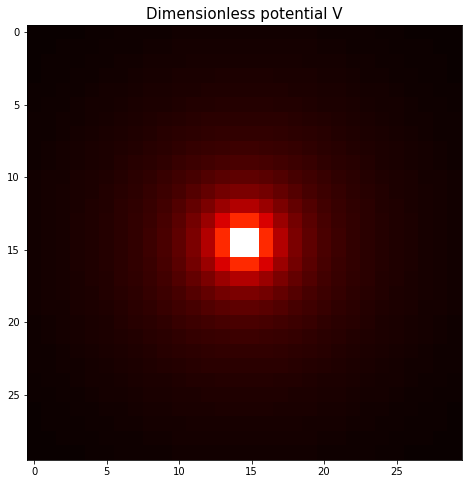

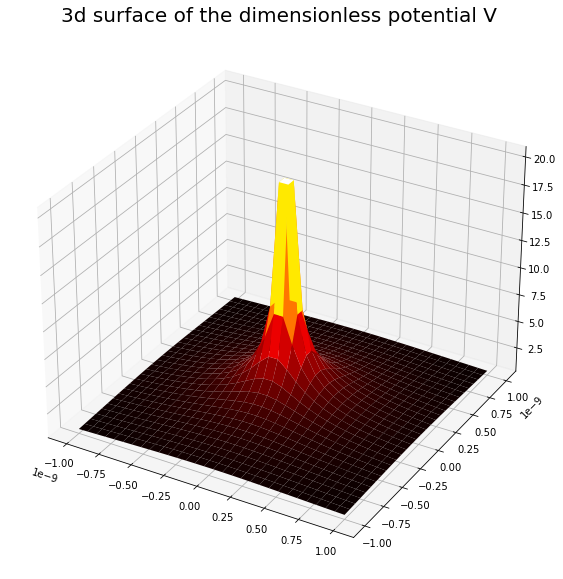

In [28]:
Z = V_r(xv,yv) #z coordinates to be plotted

#Heatmap
plt.figure(figsize =(8, 8))
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.title('Dimensionless potential V', size=15)

plt.show()

#3D surface
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xv, yv, Z, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_title('3d surface of the dimensionless potential V', size=20);

The electric field for a point particle is also known from Coulomb's law, but in general if one knows the potential one can find the electric field by using the gradient, $\vec{E}=-\nabla V$. In one dimension, the gradient is only an ordinary derivative, and we get $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. One can calculate this numerically by discretizing the derivative,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
This is an example of a finite difference quotient, more specifically this is a $\textit{central finite difference quotient}$.

$\textbf{a)}$ Derive a discrete formulation for the gradient in two dimensions using finite difference quotients.

----------------

\begin{equation}
\vec E = -\nabla V = - (\partial_x V(x,y,z) + \partial_y V(x,y,z) + \partial_z V(x,y,z)) = - (\frac{\partial V}{\partial x},\frac{\partial V}{\partial y},\frac{\partial V}{\partial z})\\
\vec V = (V_x,V_y,V_z) \\
\vec E = - (\frac{V_x(x_{i+1})-V(x_i)}{x_{i+1}-x_i}, \frac{V_y(y_{y+1}-V(y)}{y_{i+1}-y_i}, \frac{V_z(z_{i+1})-V(z)}{z_{i+1}-z_i})
\end{equation}

$\textbf{b)}$ Create a function that takes a potential $\texttt{V}$ as an argument, calculates the gradient at each point, and returns the electric field as two $n-2 \times n-2$ arrays (the reason why the dimension is $n-2$ and not $n$ is that you cannot calculate the gradient on the edge with central finite differences, but must then use either what is called forward/backward finite differences).

$\textit{Hint:}$ Use array slicing to make the code more efficient.

In [4]:
e = 1.60217 * 10 ** (-19)
k = 8.98755 * 10 ** 9

#Generate arrays
E_x=np.zeros((20,20)); E_y=np.zeros((20,20))
L1=10
x1=np.linspace(-L1,L1,20); y1=np.linspace(-L1,L1,20)

xz,yz=np.meshgrid(x1,y1) #Make meshgrid

#Fill arrays of the electric field per coordinate x and y

for i in range(0,20-1):
    for j in range(0,20-1):
        xi = xz[i,j]
        yi = yz[i,j]
        
        E_x[i,j] = xi*e*k / np.maximum(1, (np.sqrt(xi**2+yi**2)+1)*(np.sqrt(xi**2+yi**2)-1))
        E_y[i,j] = yi*e*k / np.maximum(1, (np.sqrt(xi**2+yi**2)+1)*(np.sqrt(xi**2+yi**2)-1))


$\textbf{c)}$ Plot the dimensionless electric field of a point particle in two dimensions using $\texttt{matplotlib}$'s $\texttt{quiverplot}$.

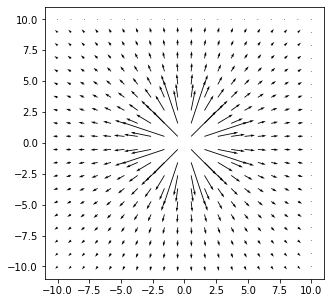

In [5]:
fig,ax=plt.subplots(figsize=(5,5))

ax.quiver(x1,y1,E_x,E_y) #Quiverplot will show a type of vectorfield representation for the electric field strength

plt.show()